In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Read Data

In [ ]:
traffic=pd.read_csv('../data/train_2.csv')

key=pd.read_csv('../data/key_2.csv')

sub=pd.read_csv('../data/sample_submission_2.csv')

In [ ]:
traffic.head()

## Extract meta data

In [ ]:
names=traffic.Page.values

langs=[]
access=[]
vtype=[]
entity=[]
for n in names:
    elements=n.split('_')
    langs.append(elements[-3])
    access.append(elements[-2])
    vtype.append(elements[-1])
    entity.append(' '.join(elements[:-3]))

### Visitor types

In [ ]:
np.unique(vtype)

### Access types

In [ ]:
np.unique(access)

### Domain types (Language types)

There are only three types of domains, while the language is the first element in '.wikipedia.org' type.

7 languages (de,en,es,fr,ja,ru,zh)

In [ ]:
add_type1=sum(list(map((lambda address: '.wikipedia.org' in address), langs)))
add_type2=sum(list(map((lambda address: 'www.mediawiki.org' in address), langs)))
add_type3=sum(list(map((lambda address: 'commons.wikimedia.org' in address), langs)))

In [ ]:
assert (add_type1+add_type2+add_type3)==len(langs),'more than 3 types of http address'

In [ ]:
np.unique(langs)

### Example of entities

In [ ]:
np.random.choice(entity,15)

## Build new dataframe

In [ ]:
traffic['langs']=langs
traffic['vtype']=vtype
traffic['access']=access
traffic['entity']=entity


In [ ]:
traffic.drop(['Page'],axis=1,inplace=True)

In [ ]:
traffic.head()

### Save

In [132]:
# traffic.to_csv('../data/cl_traffic.csv',index=False)

In [23]:
# traffic=pd.read_csv('../data/cl_traffic.csv')

In [28]:
traffic.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,langs,vtype,access,entity
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,16.0,27.0,29.0,23.0,54.0,38.0,zh.wikipedia.org,spider,all-access,2NE1
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,54.0,25.0,26.0,23.0,13.0,81.0,zh.wikipedia.org,spider,all-access,2PM
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,4.0,7.0,3.0,4.0,7.0,6.0,zh.wikipedia.org,spider,all-access,3C
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,6.0,16.0,19.0,30.0,38.0,4.0,zh.wikipedia.org,spider,all-access,4minute
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,23.0,28.0,14.0,8.0,7.0,zh.wikipedia.org,spider,all-access,52 Hz I Love You


## Exploratory analysis

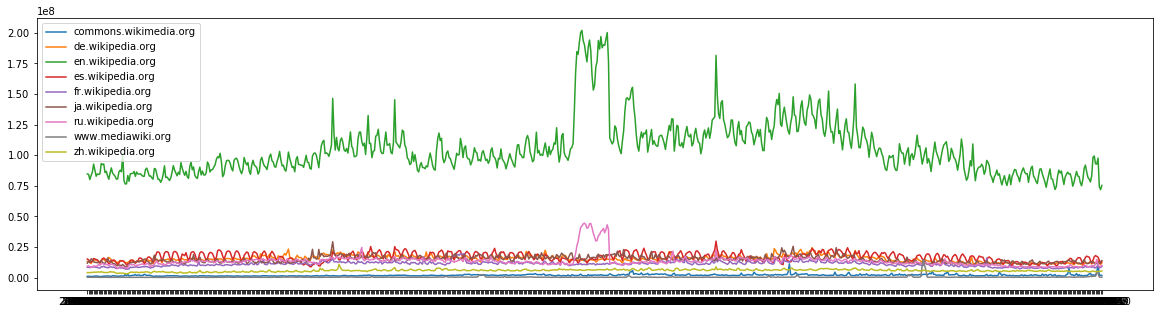

In [24]:
gpb_lang=traffic.groupby(['langs']).sum()
plt.figure(figsize=(20,5))
for i in range(len(gpb_lang)):
    language=gpb_lang.index[i]
    data=gpb_lang.iloc[i,:]
    plt.plot(data,label=language)
plt.legend()

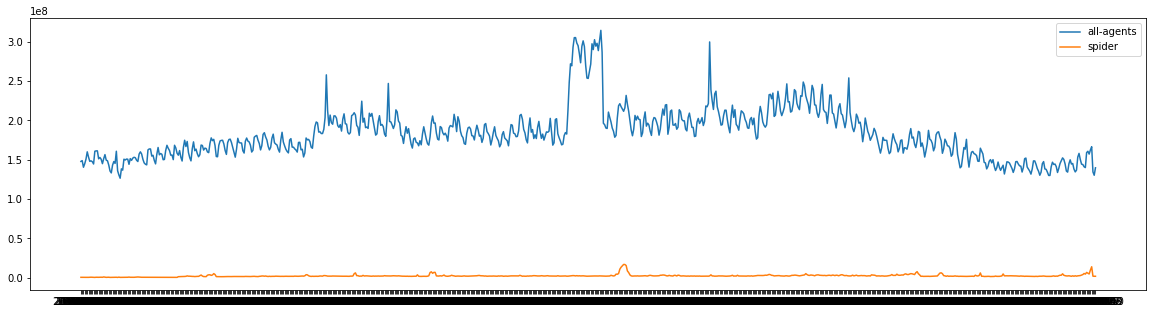

In [25]:
gpb_lang=traffic.groupby(['vtype']).sum()
plt.figure(figsize=(20,5))
for i in range(len(gpb_lang)):
    language=gpb_lang.index[i]
    data=gpb_lang.iloc[i,:]
    plt.plot(data,label=language)
plt.legend()

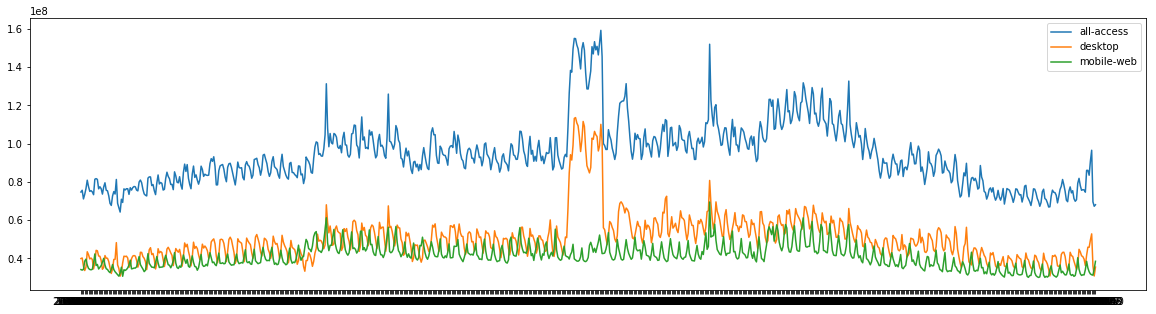

In [26]:
gpb_lang=traffic.groupby(['access']).sum()
plt.figure(figsize=(20,5))
for i in range(len(gpb_lang)):
    language=gpb_lang.index[i]
    data=gpb_lang.iloc[i,:]
    plt.plot(data,label=language)
plt.legend()